In [1]:
%matplotlib inline

In [157]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import odeint, solve_ivp



import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits import mplot3d
import random as random
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [3]:
class Robot():
    
    #Class for the robot with lengths of links and the axis defined as they would be in the defalt zero position
    
    def __init__(self, links = [.25,1,1,.75], axis = [[0,0,1],[0,1,0],[0,1,0],[0,1,0]]):
        self.links = links
        self.axis = axis
        
    def rotateAxis(self, t, vec):
        
        #Rotation matrix just taken straight from wikepedia
        
        C = 1-np.cos(t);
        x,y,z = vec;

        Rot = [[x**2*C+np.cos(t), x*y*C-z*np.sin(t), z*x*C+y*np.sin(t)],
                [x*y*C+z*np.sin(t), y**2*C+np.cos(t), z*y*C-x*np.sin(t)],
                [x*z*C-y*np. sin(t), y*z*C+x*np.sin(t), z**2*C+np.cos(t)]]

        return Rot

    def findEnd(self, angles):
        #This function takes an input vector of angles and will output the end position as
        #well as all of the vectors of the robot NOT TRANSLATED FROM THE ORIGIN
        
        v1 = [0,0,0]
        v2 = [0,0,0]
        v3 = [0,0,0]
        v4 = [0,0,0]
        
        #Starting Vector
        v1_0 = [self.links[0]/np.sqrt(2),0,self.links[0]/np.sqrt(2)];
        
        #First rotation
        v1 = np.dot(v1_0,self.rotateAxis(angles[0], self.axis[0]));
        axis1 = np.dot(self.axis[1],self.rotateAxis(angles[0], self.axis[0]));
        axis2 = np.dot(self.axis[2],self.rotateAxis(angles[0], self.axis[0]));
        axis3 = np.dot(self.axis[3],self.rotateAxis(angles[0], self.axis[0]));

        #Second Rotation
        v2 = (self.links[1]/self.links[0])*np.dot(v1,self.rotateAxis(angles[1], axis1));
        axis2 = np.dot(axis2,self.rotateAxis(angles[1], axis1));
        axis3 = np.dot(axis3,self.rotateAxis(angles[1], axis1));

        #Third Rotation
        v3 = (self.links[2]/self.links[1])*np.dot(v2,self.rotateAxis(angles[2], axis2));
        axis3 = np.dot(axis3,self.rotateAxis(angles[2], axis2));

        #Fourth rotation
        axis3 = np.dot(axis3,self.rotateAxis(angles[3], v3));

        #Fifth Rotation
        v4 = (self.links[3]/self.links[2])*np.dot(v3,self.rotateAxis(angles[4], axis3));
        
        x_val = v1[0]+v2[0]+v3[0]+v4[0]
        y_val = v1[1]+v2[1]+v3[1]+v4[1]
        z_val = v1[2]+v2[2]+v3[2]+v4[2]
        
        return [x_val, y_val, z_val, v1, v2, v3, v4]
    
    def distanceFromTarget(self,targ,angles):
        
        #Simply finds the distance between a given end from a set of angles and a target end point
        
        end = self.findEnd(angles)
        dist = (end[0]-targ[0])**2+(end[1]-targ[1])**2+(end[2]-targ[2])**2
        
        return dist
    



In [4]:
def drawRobot(v1,v2,v3,v4):
    
    #I guess the name of this function is deceptive but it takes the vectors and translates them essentially
    
    x = np.zeros(100,)
    y = np.zeros(100,)
    z = np.zeros(100,)

    # This is an admittedly weird way to do this, but it is what it is.
    # The process is like walking along in the direction of vectors 1-4 until you reach the end
    # The magnitude of the links are arbitrary but the relative size is still normal as defined
    
    for i in range(100):
        if i <= 24:
            x[i] = i*v1[0]
            y[i] = i*v1[1]
            z[i] = i*v1[2]
        elif i > 24 and i<=49:
            x[i] = 24*v1[0] + (i-24)*v2[0]
            y[i] = 24*v1[1] + (i-24)*v2[1]
            z[i] = 24*v1[2] + (i-24)*v2[2]
        elif i > 49 and i<=74:
            x[i] = 24*v1[0] + 25*v2[0]+ (i-49)*v3[0]
            y[i] = 24*v1[1] + 25*v2[1]+ (i-49)*v3[1]
            z[i] = 24*v1[2] + 25*v2[2]+ (i-49)*v3[2]
        else:
            x[i] = 24*v1[0] + 25*v2[0] + 25*v3[0] + (i-74)*v4[0]
            y[i] = 24*v1[1] + 25*v2[1] + 25*v3[1] + (i-74)*v4[1]
            z[i] = 24*v1[2] + 25*v2[2] + 25*v3[2] + (i-74)*v4[2]

    
    return x,y,z

[1.3624368670764586, 0.30177669529663653, 1.176776695296637]


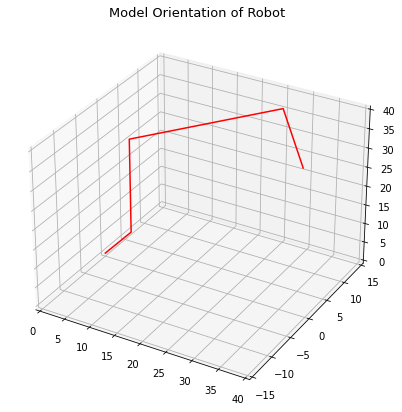

In [5]:
#Defining a instance of the robot
links = [.25,1,1,.75]
axis = [[0,0,1],[0,1,0],[0,1,0],[0,1,0]]
anglesDesired = [np.pi/4,0,0,np.pi/2,np.pi/2]

#Changing from normal physics conventions of angle definition to the way the robot defines them:
anglesConvention = [-1*anglesDesired[0],(np.pi/4-anglesDesired[1]),\
                    (-np.pi/2+anglesDesired[2]),anglesDesired[3],-1*anglesDesired[4]]

Moto = Robot(links = links, axis = axis)
End = Moto.findEnd(anglesConvention)
print([End[0],End[1],End[2]])

#Show on a 3D plot

v1,v2,v3,v4 = End[3],End[4],End[5],End[6]

x,y,z = drawRobot(v1,v2,v3,v4)
             
#print(x)
#print(y)
#print(z) 


# creating an empty canvas
fig = plt.figure(figsize = (7,7))

# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax = plt.axes(projection="3d")
ax.set_xlim(0,40)
ax.set_ylim(-15,15)
ax.set_zlim(0,40)

# plotting a 3D line graph with X-coordinate,
# Y-coordinate and Z-coordinate respectively
ax.plot3D(x,y,z, 'red')


 
# Showing the above plot
plt.title('Model Orientation of Robot',fontsize=13)
plt.show()

In [6]:
#Try some hill climbing
anglesDesired = [np.pi/4,0,0,np.pi/2,np.pi/2]
anglesConvention = [-1*anglesDesired[0],(np.pi/4-anglesDesired[1]),\
                    (-np.pi/2+anglesDesired[2]),anglesDesired[3],-1*anglesDesired[4]]
Moto = Robot(links = links, axis = axis)
End = Moto.findEnd(anglesConvention)
print(End)
Target = [End[0],End[1],End[2]]

angles_start = np.array([anglesConvention[0]-.25,anglesConvention[1]+.25,\
                   anglesConvention[2]-.25,anglesConvention[3]+.25,anglesConvention[4]-.25])
angles = np.array([anglesConvention[0]-.25,anglesConvention[1]+.25,\
                   anglesConvention[2]-.25,anglesConvention[3]+.25,anglesConvention[4]-.25])

#Step size for the hill searching
step = .1

    
dist = Moto.distanceFromTarget(Target,angles)   


for i in range(1000): #Hill climb starts
    
    #print(angles)
    dist = Moto.distanceFromTarget(Target,angles) #Try something
    #print(dist)
    
    #look somewhere else
    angles_test = [angles[0]+step*random.uniform(-1,1),angles[1]+step*random.uniform(-1,1),\
                   angles[2]+step*random.uniform(-1,1),angles[3]+step*random.uniform(-1,1),angles[4]+step*random.uniform(-1,1)]
    #print(angles_test)
    dist_test = Moto.distanceFromTarget(Target,angles_test) #try that
    
    #What it better?
    if dist_test<=dist:
        angles = angles_test;
        print('Angles Changed')
    else:
        continue
        
#print(angles)

[1.3624368670764586, 0.30177669529663653, 1.176776695296637, array([0.125    , 0.125    , 0.1767767]), array([-2.29934717e-17, -2.29934717e-17,  1.00000000e+00]), array([7.07106781e-01, 7.07106781e-01, 9.37500195e-17]), array([ 5.30330086e-01, -5.30330086e-01, -1.03830841e-16])]
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed
Angles Changed


In [7]:
#Print everything on top of each other to see how good the hill climb is
Moto_hc = Robot(links = links, axis = axis)
End_hc = Moto_hc.findEnd(angles)
End_0 = Moto.findEnd(angles_start)

v1_hc,v2_hc,v3_hc,v4_hc = End_hc[3],End_hc[4],End_hc[5],End_hc[6]
x_hc,y_hc,z_hc = drawRobot(v1_hc,v2_hc,v3_hc,v4_hc)

v1_0, v2_0, v3_0, v4_0 = End_0[3],End_0[4],End_0[5],End_0[6]
x_0,y_0,z_0 = drawRobot(v1_0,v2_0,v3_0,v4_0)

#Desired Robot:
End_desired = Moto.findEnd(anglesConvention)
#print(x)
#print(y)
#print(z) 


# creating an empty canvas
fig2 = plt.figure(figsize = (10,10))
 
# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax2 = plt.axes(projection="3d")
ax2.set_xlim(0,30)
ax2.set_ylim(-15,15)
ax2.set_zlim(0,30)
# plotting a 3D line graph with X-coordinate,
# Y-coordinate and Z-coordinate respectively
ax2.plot3D(x,y,z,'red')
ax2.plot3D(x_hc,y_hc,z_hc,'blue')
ax2.plot3D(x_0,y_0,z_0,'orange')
ax2.legend(['Desired Position','Hill Climb Position','Inital Guess'])

 
# Showing the above plot
plt.title('Hill Climb Inverse Kinematics',fontsize=20)
plt.show()


In [170]:
def Gauss(t_pts, sigma, mean, amp ):
    f = np.zeros(len(t_pts))
    time_end = t_pts[-1] + (t_pts[1]-t_pts[0])
    max_sig = time_end/8;
    sigma_adj = max_sig*sigma
    for i in range(len(t_pts)):
        f[i] = amp*np.exp(-(t_pts[i]-mean)**2/(2*sigma_adj**2))
    
    return f

In [171]:
def num_integrate(vel,t_pts):
    area = 0
    delta_x = t_pts[1]-t_pts[0]
    theta = np.zeros(len(vel))
    
    for i in range(len(vel)):
        area = area + vel[i]*delta_x
        theta[i] = area
        
    return theta 

In [172]:
def find_amp(sigma,delta_theta,t_pts):
    time_end = t_pts[-1] + (t_pts[1]-t_pts[0])
    max_sig = time_end/8;
    sigma_adj = max_sig*sigma
    amp = delta_theta/(sigma_adj*np.sqrt(2*np.pi))
    return amp

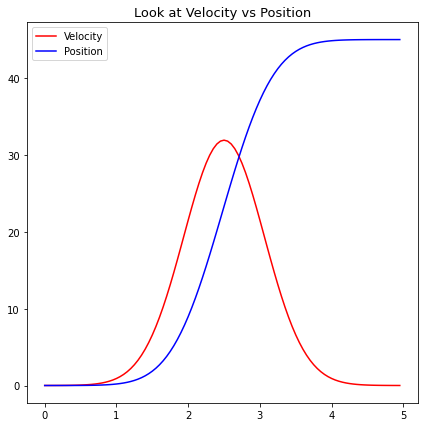

In [173]:
t_start = 0
t_end = 5
delta_t = t_end/100
t_pts = np.arange(t_start,t_end,delta_t)
delta_theta = 45
sigma = 0.9
mean = t_end/2
amp = find_amp(sigma, delta_theta,t_pts)
vel = Gauss(t_pts,sigma,mean,amp)
theta = num_integrate(vel,t_pts)

# creating an empty canvas
fig_test = plt.figure(figsize = (7,7))

# defining the axis
ax_test = fig_test.add_subplot(1,1,1)

#Plotting the velocity and positions on each other
ax_test.plot(t_pts,vel,'red')
ax_test.plot(t_pts,theta,'blue')
# Showing the above plot
plt.title('Look at Velocity vs Position',fontsize=13)
plt.legend(['Velocity','Position'])
plt.show()

100
4.1887902047863905


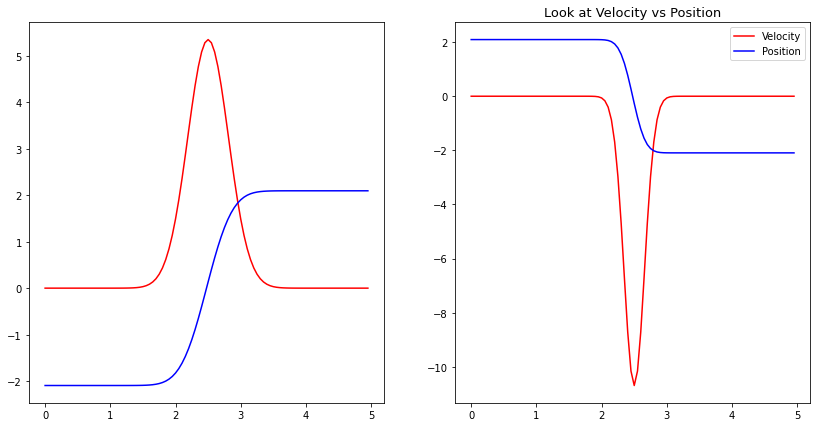

100
100
100
100
100


'\n#B = np.arange(B_start, B_end,B_delta_t); #J-Move\n\n#Faster Move\nfirst = np.ones(40)*B_start;\nlast = np.ones(40)*B_end;\ninside = np.arange(B_start,B_end,B_delta_t_fast);\nB= np.append(first,np.append(inside,last)); \n'

In [174]:
# THIS IS the S FUNCTION PART

                                                                      


t_start = 0
t_end = 5
delta_t = t_end/100;
t_pts = np.arange(t_start,t_end,delta_t)
print(len(t_pts))

# Hips move Gauss S
S_start = -np.pi*2/3;
S_end = np.pi*2/3;
S_delta_t = (S_end-S_start)
sigma_s = 0.5
mean_s = t_end/2
amp_s = find_amp(sigma_s, S_delta_t,t_pts)
vel_s = Gauss(t_pts,sigma_s,mean_s,amp_s)
S = S_start + num_integrate(vel_s,t_pts)

# Wrist Moves Gauss B
B_start = np.pi*2/3
B_end = -np.pi*2/3
B_delta_t = (B_end-B_start)*-1
sigma_b = 0.25
mean_b = t_end/2
amp_b = find_amp(sigma_b, B_delta_t,t_pts)
vel_b = -1*Gauss(t_pts,sigma_b,mean_b,amp_b)
B = B_start + num_integrate(vel_b,t_pts)

"""
#Arms Move Gauss U
U_start = 0
U_end = -np.pi/3
U_delta_t = (U_end-U_start)*-1    
sigma_u = 0.4
mean_u = t_end/3
amp_u = find_amp(sigma_u, U_delta_t,t_pts)
vel_u = -1*Gauss(t_pts,sigma_u,mean_u,amp_u)
U = U_start + num_integrate(vel_u,t_pts)
"""
print(B_delta_t)
L = np.ones(len(t_pts))*np.pi/24;
U = np.ones(len(t_pts))*-np.pi/3;
R = np.ones(len(t_pts))*np.pi/2;

#Plot the interesting ones
# creating an empty canvas
fig2= plt.figure(figsize = (14,7))

# defining the axis
ax_S = fig2.add_subplot(1,2,1)
ax_B = fig2.add_subplot(1,2,2)
#Plotting the velocity and positions on each other
ax_S.plot(t_pts,vel_s,'red')
ax_S.plot(t_pts,S,'blue')
ax_B.plot(t_pts,vel_b,'red')
ax_B.plot(t_pts,B,'blue')
# Showing the above plot
plt.title('Look at Velocity vs Position',fontsize=13)
plt.legend(['Velocity','Position'])
plt.show()

print(len(B))
print(len(S))
print(len(L))
print(len(R))
print(len(U))

"""
#B = np.arange(B_start, B_end,B_delta_t); #J-Move

#Faster Move
first = np.ones(40)*B_start;
last = np.ones(40)*B_end;
inside = np.arange(B_start,B_end,B_delta_t_fast);
B= np.append(first,np.append(inside,last)); 
"""

-0.0
-0.0
0.0


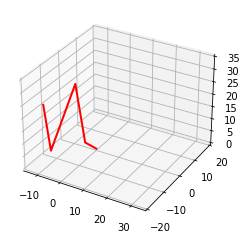

In [175]:
#Animation setup

fig_anim = plt.figure(figsize=(4,4))
ax_anim = plt.axes(projection = "3d")
ax_anim.set_xlim(-15,35)
ax_anim.set_ylim(-20,20)
ax_anim.set_zlim(0,35)

#Defining a instance of the robot
links = [.25,1,1,.75]
axis = [[0,0,1],[0,1,0],[0,1,0],[0,1,0]]
MotoAnimate = Robot(links = links, axis = axis)




anglesDesired_anim = [S[0],L[0],U[0],R[0],B[0]];
#Changing from normal physics conventions of angle definition to the way the robot defines them:
anglesConvention_anim = [-1*anglesDesired_anim[0],(np.pi/4-anglesDesired_anim[1]),\
                    (-np.pi/2+anglesDesired_anim[2]),anglesDesired_anim[3],-1*anglesDesired_anim[4]]

End_anim = Moto.findEnd(anglesConvention_anim)
#print([End[0],End[1],End[2]])

v1_anim,v2_anim,v3_anim,v4_anim = End_anim[3],End_anim[4],End_anim[5],End_anim[6]

x_anim,y_anim,z_anim = drawRobot(v1_anim,v2_anim,v3_anim,v4_anim)
line_anim, = ax_anim.plot(x_anim,y_anim,z_anim,'red',lw =2)

print(x_anim[0])
print(y_anim[0])
print(z_anim[0])

In [176]:
#Maybe we can animate a swing??? 


             

def animate_swing(i):
    
    anglesDesired_anim = [S[i],L[i],U[i],R[i],B[i]];
    #Changing from normal physics conventions of angle definition to the way the robot defines them:
    anglesConvention_anim = [-1*anglesDesired_anim[0],(np.pi/4-anglesDesired_anim[1]),\
                        (-np.pi/2+anglesDesired_anim[2]),anglesDesired_anim[3],-1*anglesDesired_anim[4]]

    End_anim = Moto.findEnd(anglesConvention_anim)
    #print([End[0],End[1],End[2]])

    v1_anim,v2_anim,v3_anim,v4_anim = End_anim[3],End_anim[4],End_anim[5],End_anim[6]


    x_anim,y_anim,z_anim = drawRobot(v1_anim,v2_anim,v3_anim,v4_anim)
    line_anim.set_xdata(x_anim)
    line_anim.set_ydata(y_anim)
    line_anim.set_3d_properties(z_anim)
    return(line_anim,)

In [177]:
frame_interval = 10*t_end  # time between frames
frame_number = len(t_pts)    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_swing, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=True)


In [178]:
HTML(anim.to_jshtml())